## POSTTEST KB 8

Nama : Patricia Chandra

NIM : 2009106030

Kelas : Informatika A

## Klasifikasi Dataset dengan DNN

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

1. Load Dataset MNIST

In [2]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = datasets.mnist.load_data()

2. Encoding Label

In [3]:
num_class = 18

# One Hot Decoding
y_train = keras.utils.to_categorical(y_train_raw, num_class)
y_test = keras.utils.to_categorical(y_test_raw, num_class)

print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


3. Preview Gambar Dataset

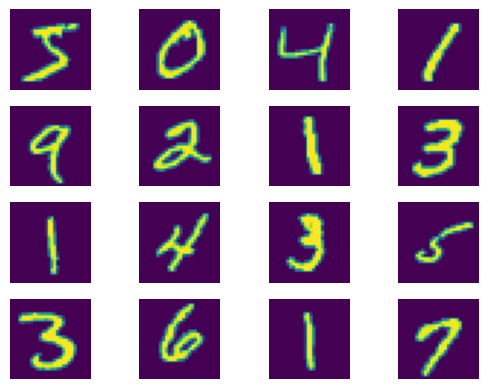

In [4]:
plt.figure()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train_raw[i])
    plt.axis('off')
    
plt.show()

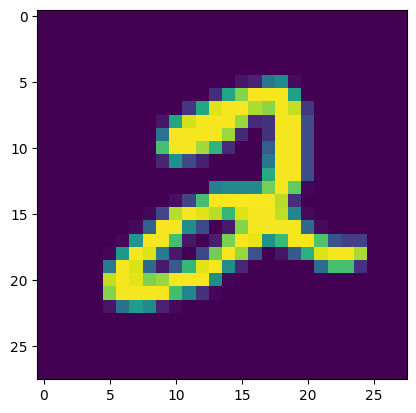

In [5]:
plt.imshow(X_train_raw[5])

4. Reshape Gambar Dataset

In [6]:
X_train = X_train_raw.reshape(60000,784)
X_test = X_test_raw.reshape(10000,784)

5. Normalisasi Dataset

In [7]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

6. Buat Model

In [8]:
model = keras.Sequential()

In [10]:
# Input Layer
model.add(layers.Dense(256, activation='relu', input_dim=784))

# Hidden Layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output Layer
model.add(layers.Dense(18, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 18)                2322      
                                                                 
Total params: 252,690
Trainable params: 252,690
Non-trainable params: 0
_________________________________________________________________


7. Compile Model

In [12]:
Optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(loss=keras.losses.binary_crossentropy, optimizer=Optimizer,
                   metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
938/938 [==============================] - 6s 3ms/step - loss: 0.0353 - accuracy: 0.9035
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0110 - accuracy: 0.9683
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0071 - accuracy: 0.9796
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0053 - accuracy: 0.9849
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0038 - accuracy: 0.9892
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0031 - accuracy: 0.9908
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0025 - accuracy: 0.9931
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0022 - accuracy: 0.9940
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0019 - accuracy: 0.9946
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0016 - accuracy: 0.9957

8. Evaluate Model

In [15]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss      :', score[0])
print(f'Test accuracy  : {round(score[1] * 100,2)}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9801
Test loss      : 0.009066930040717125
Test accuracy  : 98.01%


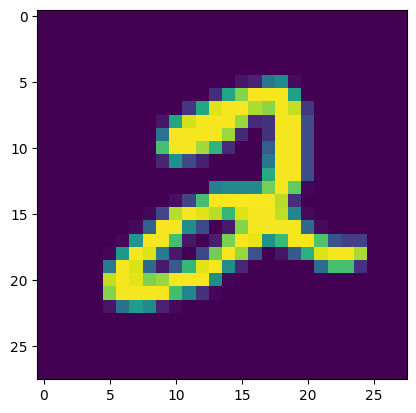

In [18]:
plt.imshow(X_train_raw[5])

## 

Save Model

In [19]:
model.save('Model_Posttest_KB_8.hS')

INFO:tensorflow:Assets written to: Model_Posttest_KB_8.hS\assets
